In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix

In [8]:
housing  = pd.read_csv("C:/Users/surya/Downloads/Housing1.csv")
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
train_set , test_set = train_test_split(housing , test_size = 0.2 , random_state = 42)

print(f"Rows in train set: {len(train_set)} \n Rows in test set: {len(test_set)}")

Rows in train set: 404 
 Rows in test set: 102


In [10]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2 , random_state=42)
for train_index , test_index in split.split(housing , housing['chas']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [11]:
housing = strat_train_set.copy()
housing.shape

(404, 14)

In [12]:
housing = strat_train_set.drop("medv" , axis=1)
housing_labels = strat_train_set["medv"].copy()

In [13]:
#pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer as Imputer

my_pipline = Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('std_scaler' , StandardScaler())
])

In [14]:
housing_num_tr = my_pipline.fit_transform(housing)
housing_num_tr.shape

(404, 13)

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(housing_num_tr , housing_labels)

LinearRegression()

In [16]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
prepared_data = my_pipline.transform(some_data)
model.predict(prepared_data)

array([23.94996893, 27.21690623, 20.58079789, 25.04088721, 23.76177838])

In [17]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [18]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels , housing_predictions)
rmse = np.sqrt(mse)

rmse

4.829321492635759

In [19]:
#cross validation 

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr, housing_labels, scoring= "neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)

rmse_scores

array([4.21674442, 4.26026816, 5.1071608 , 3.82881892, 5.34093789,
       4.3785611 , 7.47384779, 5.48226252, 4.14885722, 6.0669122 ])

In [20]:
def print_scores(scores):
    print(scores)
    print('mean : ', scores.mean())
    print('standard deviation  : ', scores.std())
    
print_scores(rmse_scores)

[4.21674442 4.26026816 5.1071608  3.82881892 5.34093789 4.3785611
 7.47384779 5.48226252 4.14885722 6.0669122 ]
mean :  5.030437102767305
standard deviation  :  1.0607661158294834


In [21]:
from joblib import  dump, load 
dump(model , 'house_price.joblib')

['house_price.joblib']

In [22]:
#testing 
X_test = strat_test_set.drop("medv" , axis=1)
Y_test = strat_test_set["medv"].copy()
X_test_prepared = my_pipline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test , final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions , list(Y_test))

[22.69663678 17.22600313 30.02303718 30.72767895  8.8510416  13.31467014
 17.29615732 17.74740541 32.49300647 36.05576682 16.37971118  0.55763712
 22.98231849 20.44805414 20.04676103 12.94089562 31.14959131 13.42383778
 25.02732037 24.1680579  20.41663802 17.05356046 17.82193794 25.60370774
 19.51063444 32.83523603 19.43372437 33.72021979  8.02922445 34.67322625
 19.51326153 21.4383898  29.31429776 16.35664997 26.98334343 18.35632929
 37.3141123  24.56541978 22.2186496  37.13515388 25.15918226 34.48919537
 23.4490451  24.01052594 18.52058894 32.69367712 38.47436972 21.39603535
 17.65060105 16.24434034 21.24195102 12.40190011 19.88486433 20.40554849
 27.94261106 33.08938174 40.13445849 31.36345155 14.94004062 19.73822665
 40.48290495 18.11543107 15.13757279 27.66353013 19.49519021 32.50860212
 23.40912101 20.30670328 21.16556351 33.78834117 34.10260096 27.63685041
 24.51460463 21.88751595 36.17309546  8.58176976 17.42620124 21.46806914
 20.54643262 23.00127296 25.98733788 22.55143049 14

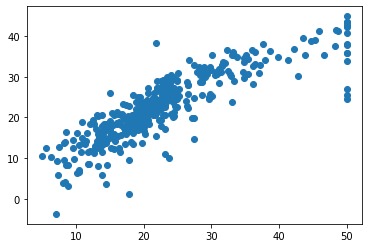

In [23]:
plt.scatter(housing_labels,housing_predictions)